# ⚙️ assignment:

برای ساخت یک متغیر از نوع عدد صحیح کافیه یک عدد بدون اعشار تعریف کنیم:


```
a = 5
b = -7
c = 0

```



## ✅ نکته

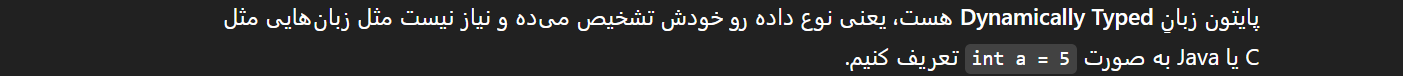

## ✅  بررسی نوع داده

```
print(type(a))  # <class 'int'>
```



# ⚙️ casting:
از سایر داده‌ها int روش‌های ایجاد



```
a = int(5.9)   # 5 (اعشار حذف میشه)
b = int("10")  # 10 تبدیل رشته به عدد صحیح

```



## ✅ هشدار

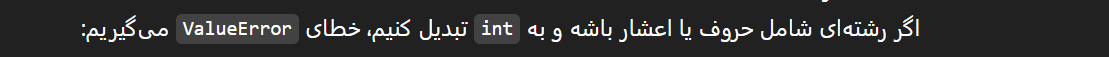



```
int("10.5")  # ValueError
int("hello") # ValueError

```



# ⚙️ Arithmetic Operations:
عملیات اصلی حسابی

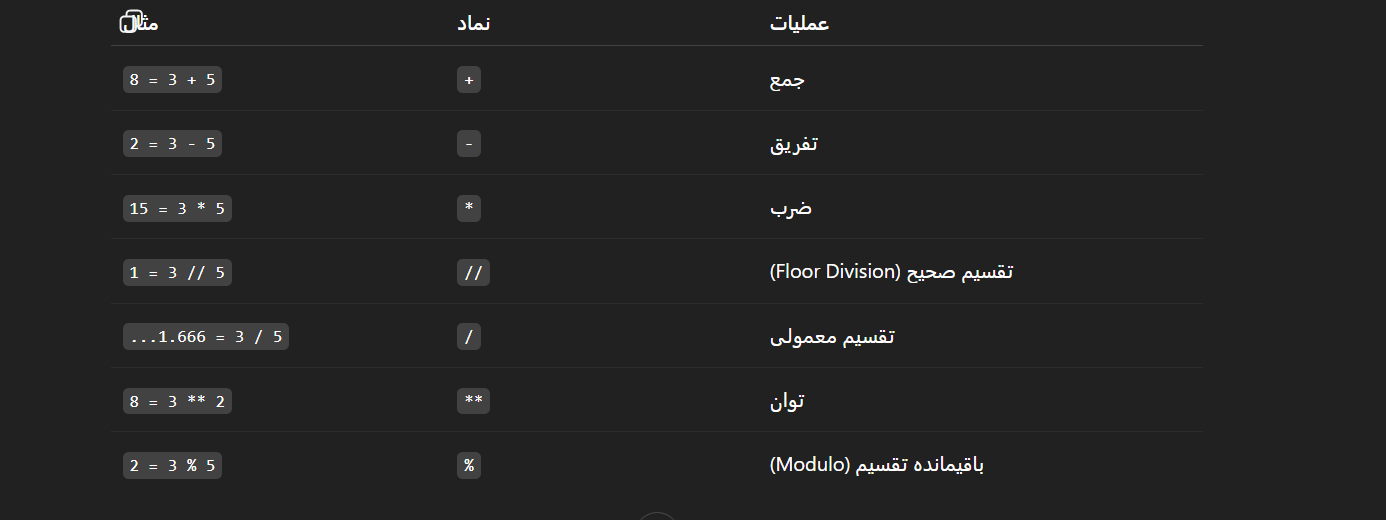

## ✅ نکته

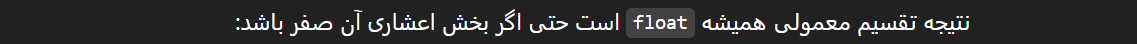



```
print(6 / 2) # 3.0 (float)

```



# ⚙️ متدها و توابع کاربردی :

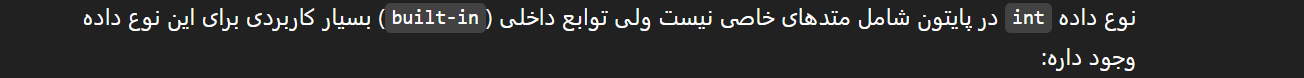

## ✅ abs()



```
print(abs(-10))  # 10

```



## ✅ pow(base, exp)



```
print(pow(2, 3))  # 8

```



## ✅ divmod(x,y)


```
print(divmod(17, 5))  # (3, 2)

```



## ✅ round(x)



```
print(round(10.6))  # 11
print(round(10.4))  # 10

```



# ⚙️ Arbitrary-precision arithmetic:
اعداد صحیح بزرگ

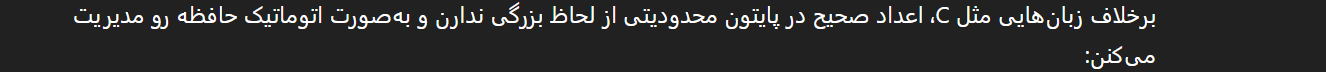



```
big_number = 10 ** 1000  # عدد خیلی بزرگ
print(big_number)

```



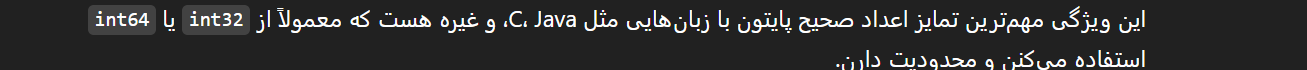

# ⚙️ interning
نکته پیشرفته: بهینه‌سازی پایتون با مفهوم

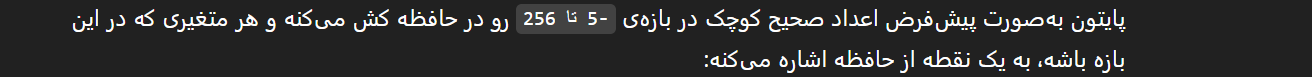



```
a = 100
b = 100
print(a is b)  # True

x = 257
y = 257
print(x is y)  # False

```



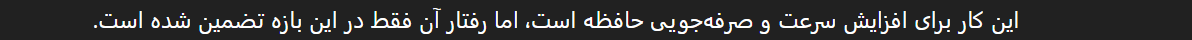

# ⚙️ CPython (bytecode) بررسی در سطح
تحلیل عمیق‌تر

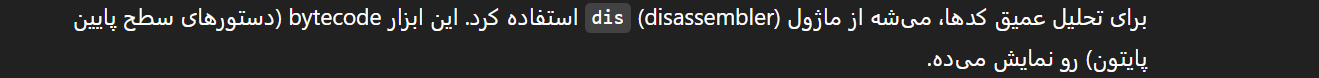



```
import dis

def add_numbers(a: int, b: int) -> int:
    return a + b

dis.dis(add_numbers)

```


```
  4           0 LOAD_FAST                0 (a)
              2 LOAD_FAST                1 (b)
              4 BINARY_ADD
              6 RETURN_VALUE

```




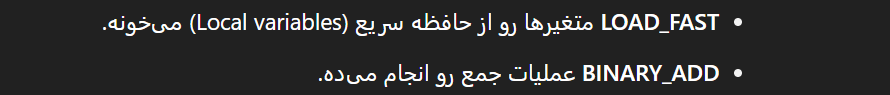

# ⚙️ نکات تکمیلی و توصیه‌های پیشرفته:


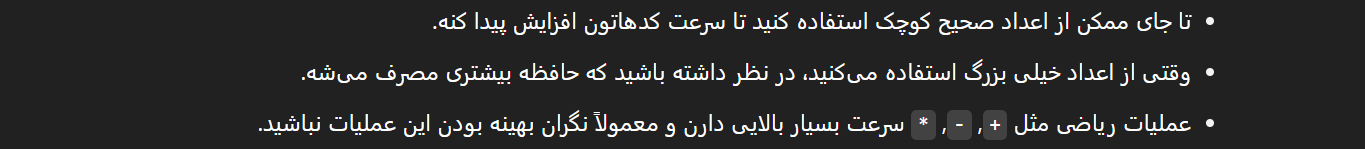

## 🎯 sys.int_info

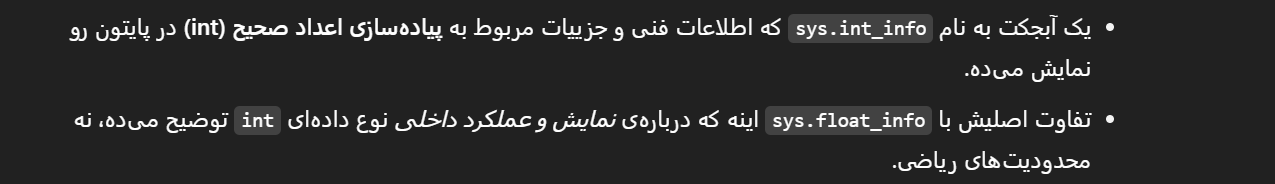

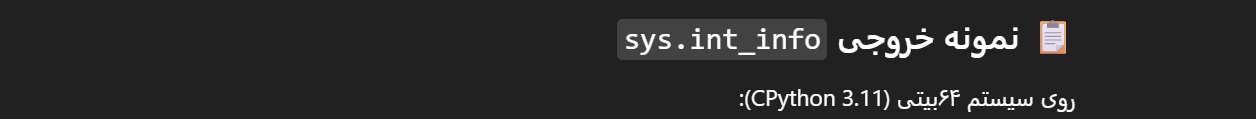

In [34]:
import sys
print(sys.int_info)

sys.int_info(bits_per_digit=30, sizeof_digit=4, default_max_str_digits=4300, str_digits_check_threshold=640)


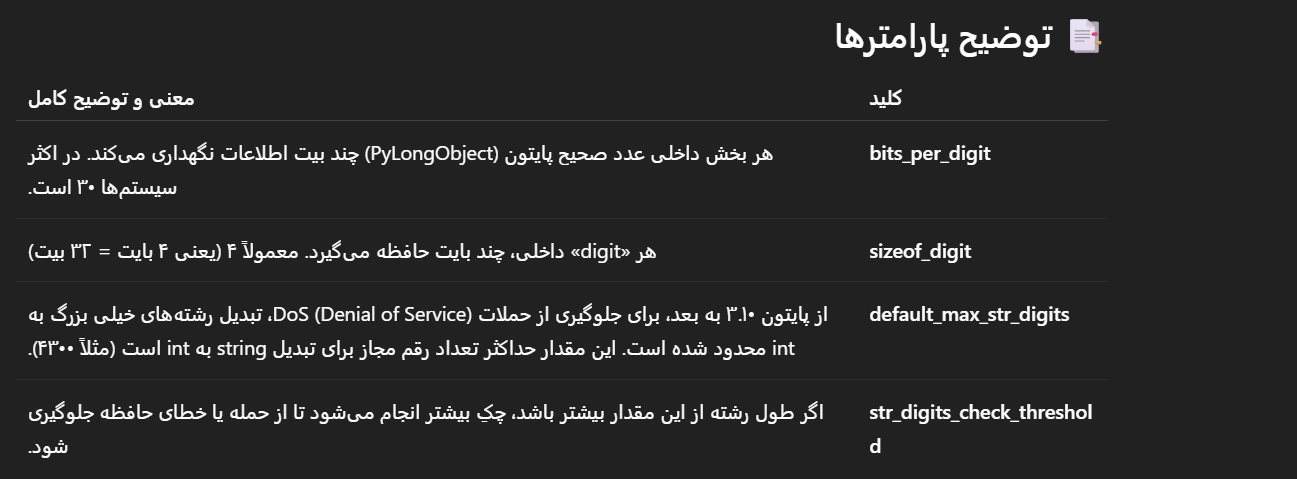

In [33]:
import sys, math

def info(n):
  print(f"_______{n}________")
  print(f"memory size for {n}: {sys.getsizeof(n)}")
  print(f"{n} is shown by {n.bit_length()} bits (or {math.ceil(n.bit_length() / 30)} chunks(digits) in binary mode")
  print(f"{n} in binary is: {bin(n)}")

info(0)
info(2**30-1)
info(2**30)


sys.int_info(bits_per_digit=30, sizeof_digit=4, default_max_str_digits=4300, str_digits_check_threshold=640)
_______0________
memory size for 0: 28
0 is shown by 0 bits (or 0 chunks(digits) in binary mode
0 in binary is: 0b0
_______1073741823________
memory size for 1073741823: 28
1073741823 is shown by 30 bits (or 1 chunks(digits) in binary mode
1073741823 in binary is: 0b111111111111111111111111111111
_______1073741824________
memory size for 1073741824: 32
1073741824 is shown by 31 bits (or 2 chunks(digits) in binary mode
1073741824 in binary is: 0b1000000000000000000000000000000


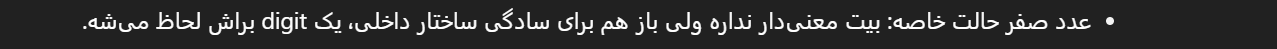

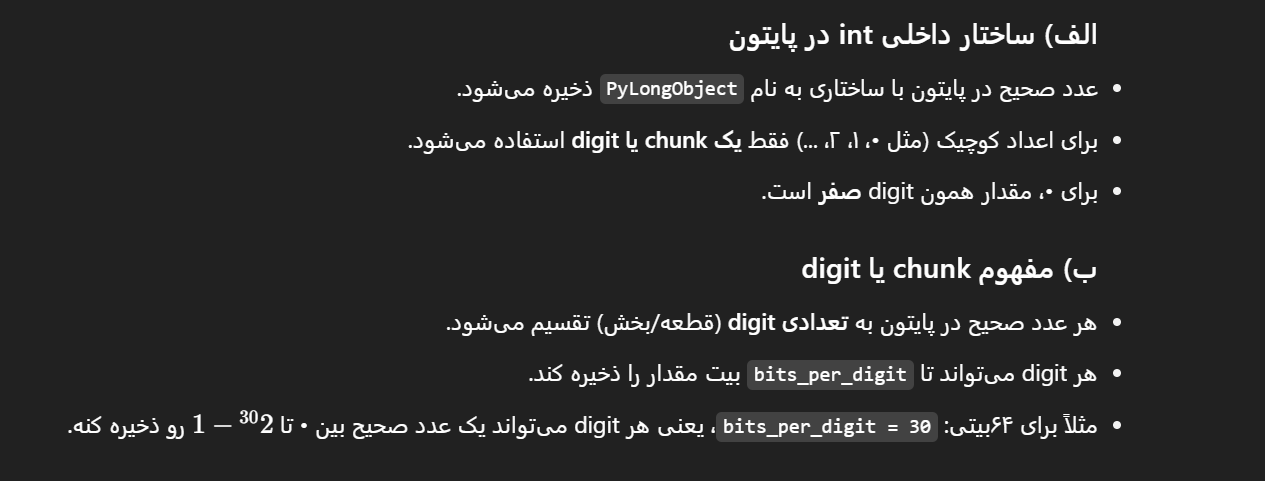

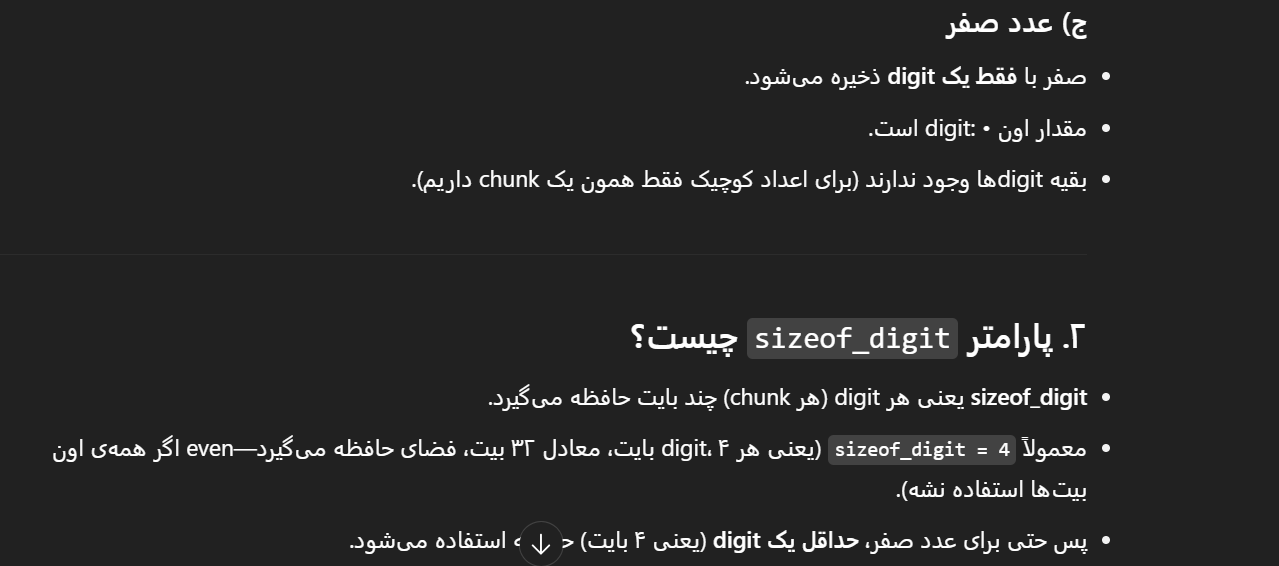

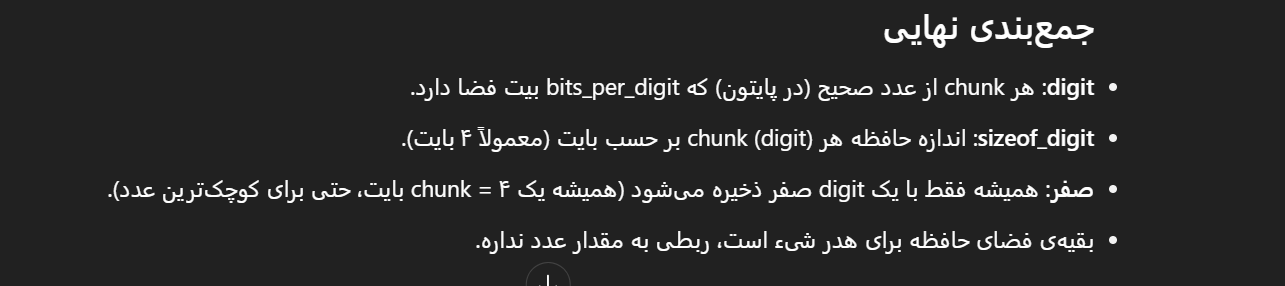

# ⚙️ تمرین عملی

## 🎯 1

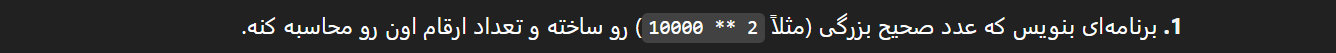

### 🔍 کد من

In [ ]:
# ver 1
def ver_1():
  x = 2 ** 10000
  return f"{len(str(x))} digits"
print(ver_1())

3011 digits


In [ ]:
# ver 2
def ver_2():
  x = pow(2,10000)
  counter = 0
  while x >= 1:
    x = x // 10
    counter += 1
  return f"{counter} digits"
print(ver_2())

3011 digits


 ### 📌 بررسی کد

#### نسخه اول




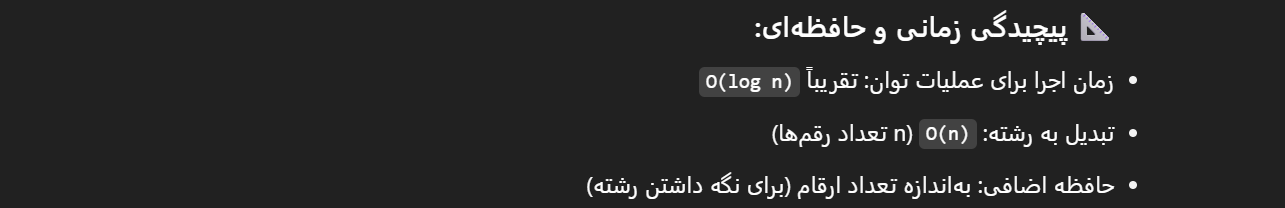

#### نسخه دوم

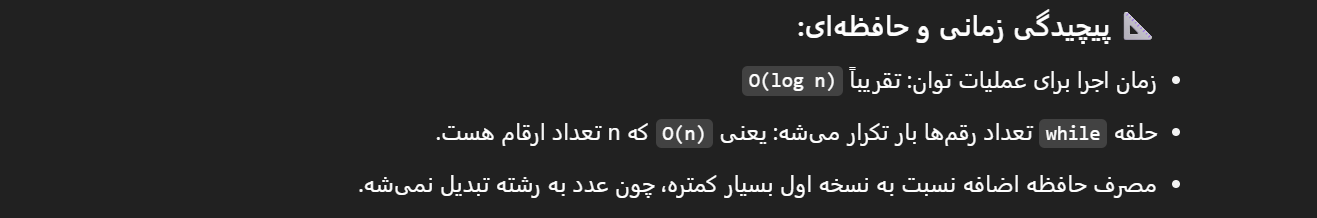

#### کدوم بهینه‌تره؟

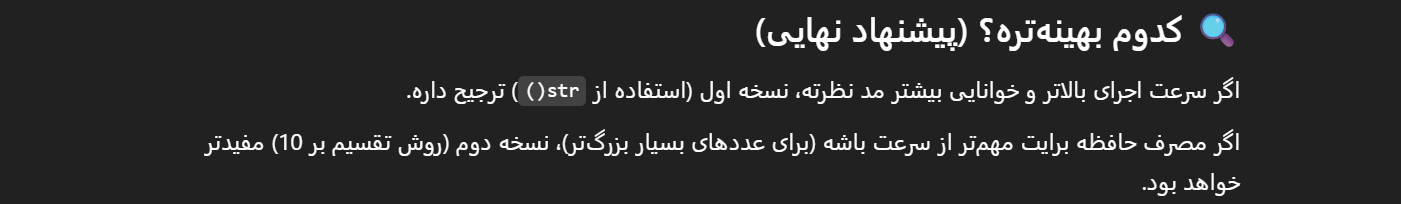

### 🚀 پیشنهاد بهینه‌تر

In [ ]:
import math
def ver_3():
  x = 2 ** 10000
  digits = math.floor(math.log10(x)) + 1
  return f"{digits} digits"
print(ver_3())

3011 digits


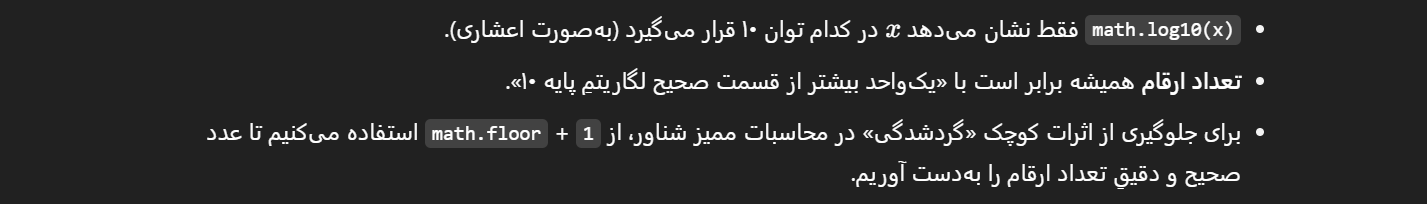

### 🧩 Analysis: timeit

In [ ]:
import timeit
print(timeit.timeit("x = 2 ** 10000", number = 1000))
print(timeit.timeit(ver_1, number = 1000))
print(timeit.timeit(ver_2,  number = 1000))
print(timeit.timeit(ver_3, number = 1000))

0.02629723800055217
0.26002418200005195
3.1589977479998197
0.02308466300019063


### 🧩 Analysis: dis

In [ ]:
import dis
print(dis.dis(ver_1))

  2           0 RESUME                   0

  3           2 LOAD_CONST               1 (2)
              4 LOAD_CONST               2 (10000)
              6 BINARY_OP                8 (**)
             10 STORE_FAST               0 (x)

  4          12 LOAD_GLOBAL              1 (NULL + len)
             24 LOAD_GLOBAL              3 (NULL + str)
             36 LOAD_FAST                0 (x)
             38 PRECALL                  1
             42 CALL                     1
             52 PRECALL                  1
             56 CALL                     1
             66 FORMAT_VALUE             0
             68 LOAD_CONST               3 (' digits')
             70 BUILD_STRING             2
             72 RETURN_VALUE
None


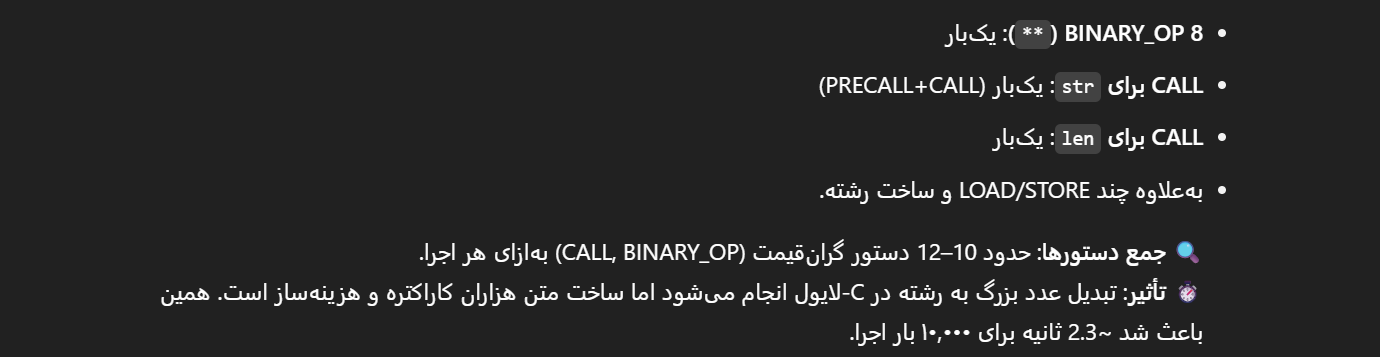

In [ ]:
print(dis.dis(ver_2))

  2           0 RESUME                   0

  3           2 LOAD_GLOBAL              1 (NULL + pow)
             14 LOAD_CONST               1 (2)
             16 LOAD_CONST               2 (10000)
             18 PRECALL                  2
             22 CALL                     2
             32 STORE_FAST               0 (x)

  4          34 LOAD_CONST               3 (0)
             36 STORE_FAST               1 (counter)

  5          38 LOAD_FAST                0 (x)
             40 LOAD_CONST               4 (1)
             42 COMPARE_OP               5 (>=)
             48 POP_JUMP_FORWARD_IF_FALSE    16 (to 82)

  6     >>   50 LOAD_FAST                0 (x)
             52 LOAD_CONST               5 (10)
             54 BINARY_OP                2 (//)
             58 STORE_FAST               0 (x)

  7          60 LOAD_FAST                1 (counter)
             62 LOAD_CONST               4 (1)
             64 BINARY_OP               13 (+=)
             68 STORE_FAST   

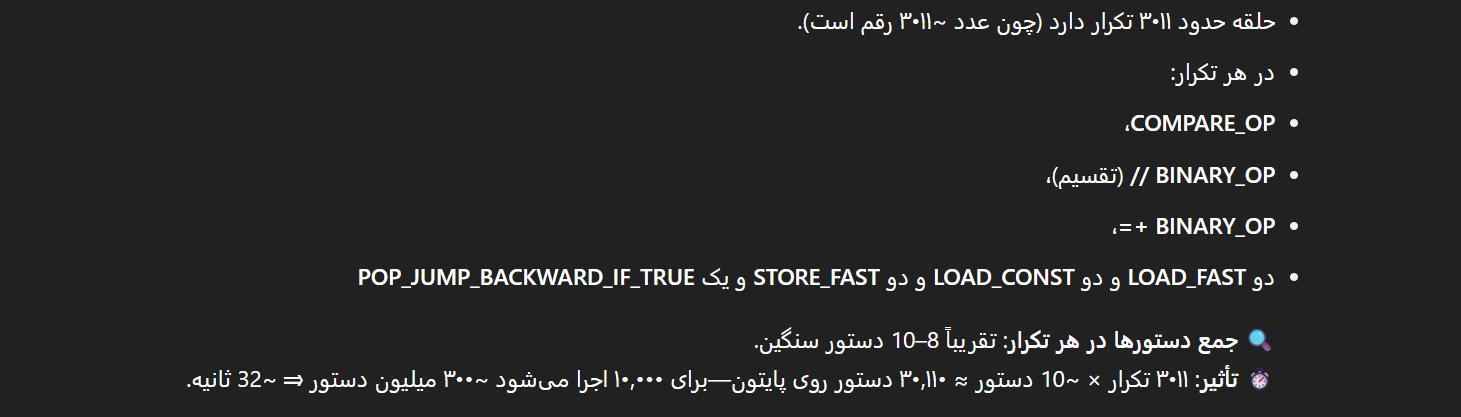

In [ ]:
print(dis.dis(ver_3))

  2           0 RESUME                   0

  3           2 LOAD_CONST               1 (2)
              4 LOAD_CONST               2 (10000)
              6 BINARY_OP                8 (**)
             10 STORE_FAST               0 (x)

  4          12 LOAD_GLOBAL              0 (math)
             24 LOAD_METHOD              1 (floor)
             46 LOAD_GLOBAL              0 (math)
             58 LOAD_METHOD              2 (log10)
             80 LOAD_FAST                0 (x)
             82 PRECALL                  1
             86 CALL                     1
             96 PRECALL                  1
            100 CALL                     1
            110 LOAD_CONST               3 (1)
            112 BINARY_OP                0 (+)
            116 STORE_FAST               1 (digits)

  5         118 LOAD_FAST                1 (digits)
            120 FORMAT_VALUE             0
            122 LOAD_CONST               4 (' digits')
            124 BUILD_STRING             2
 

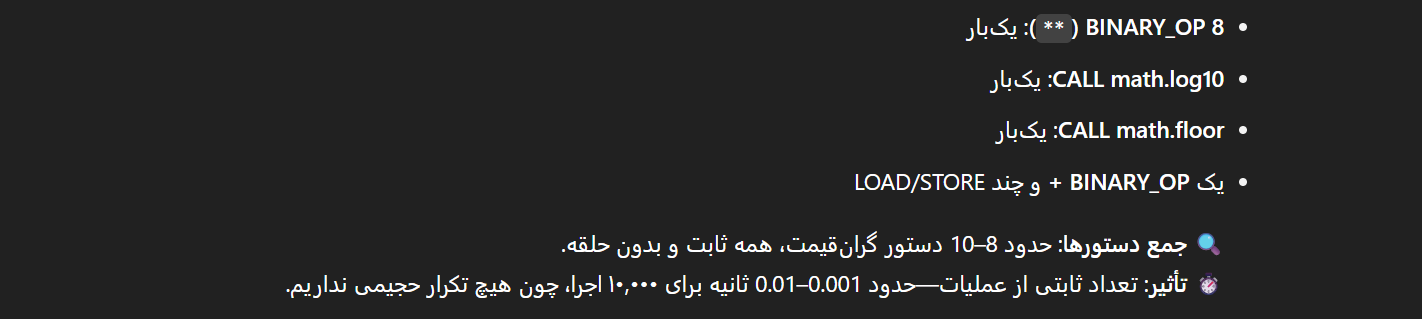

## 🎯 2

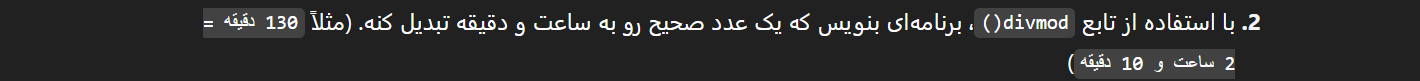

In [ ]:
import dis
def convert_to_hours_minutes():
  total_minutes = 130
  return (f"{divmod(total_minutes, 60)[0]} hours, {divmod(total_minutes, 60)[1]} minutes" )
dis.dis(convert_to_hours_minutes)
def convert_to_hours_minutes1():
  total_minutes = 130
  t_converted = divmod(total_minutes, 60)
  return (f"{t_converted[0]} hours, {t_converted[1]} minutes ")
dis.dis(convert_to_hours_minutes1)
import timeit
print(timeit.timeit(convert_to_hours_minutes, number= 1000000))
print(timeit.timeit(convert_to_hours_minutes1, number= 1000000))
convert_to_hours_minutes1()

  2           0 RESUME                   0

  3           2 LOAD_CONST               1 (130)
              4 STORE_FAST               0 (total_minutes)

  4           6 LOAD_GLOBAL              1 (NULL + divmod)
             18 LOAD_FAST                0 (total_minutes)
             20 LOAD_CONST               2 (60)
             22 PRECALL                  2
             26 CALL                     2
             36 LOAD_CONST               3 (0)
             38 BINARY_SUBSCR
             48 FORMAT_VALUE             0
             50 LOAD_CONST               4 (' hours, ')
             52 LOAD_GLOBAL              1 (NULL + divmod)
             64 LOAD_FAST                0 (total_minutes)
             66 LOAD_CONST               2 (60)
             68 PRECALL                  2
             72 CALL                     2
             82 LOAD_CONST               5 (1)
             84 BINARY_SUBSCR
             94 FORMAT_VALUE             0
             96 LOAD_CONST               6 (' m

'2 hours, 10 minutes '

## 🎯 3

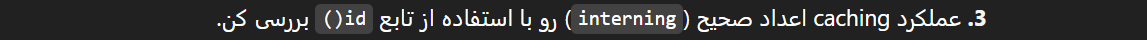

In [ ]:
x = 10
print(id(x))
y= 10
print(id(y))
print(x is y)
for i in range(-6, 258):
  print(i,id(i),id(i)-id(i-1))

10758024
10758024
True
-6 137451511288080 544
-5 10757544 -137451500531048
-4 10757576 32
-3 10757608 32
-2 10757640 32
-1 10757672 32
0 10757704 32
1 10757736 32
2 10757768 32
3 10757800 32
4 10757832 32
5 10757864 32
6 10757896 32
7 10757928 32
8 10757960 32
9 10757992 32
10 10758024 32
11 10758056 32
12 10758088 32
13 10758120 32
14 10758152 32
15 10758184 32
16 10758216 32
17 10758248 32
18 10758280 32
19 10758312 32
20 10758344 32
21 10758376 32
22 10758408 32
23 10758440 32
24 10758472 32
25 10758504 32
26 10758536 32
27 10758568 32
28 10758600 32
29 10758632 32
30 10758664 32
31 10758696 32
32 10758728 32
33 10758760 32
34 10758792 32
35 10758824 32
36 10758856 32
37 10758888 32
38 10758920 32
39 10758952 32
40 10758984 32
41 10759016 32
42 10759048 32
43 10759080 32
44 10759112 32
45 10759144 32
46 10759176 32
47 10759208 32
48 10759240 32
49 10759272 32
50 10759304 32
51 10759336 32
52 10759368 32
53 10759400 32
54 10759432 32
55 10759464 32
56 10759496 32
57 10759528 32
58 10

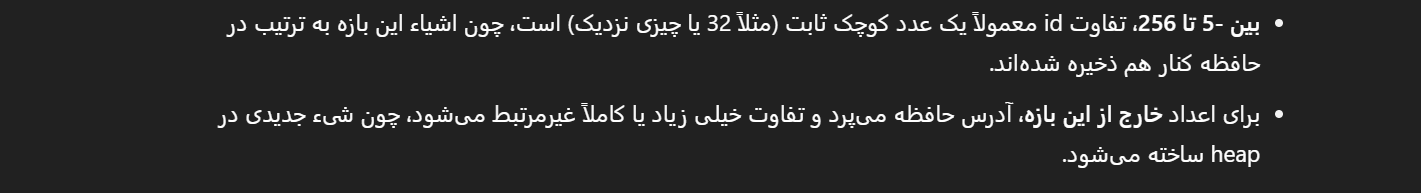

# ⚙️ Appendix

## import timeit

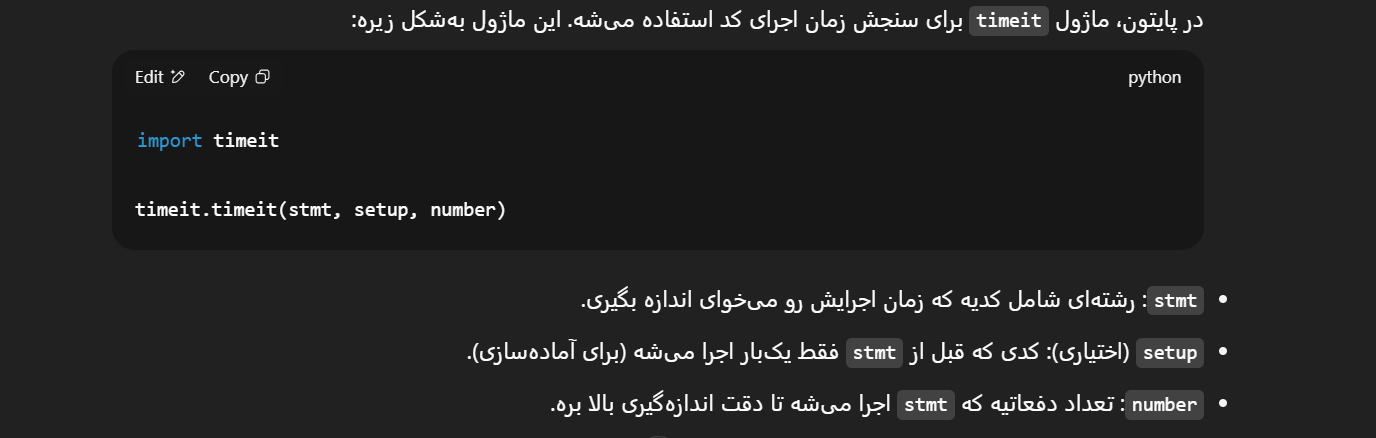

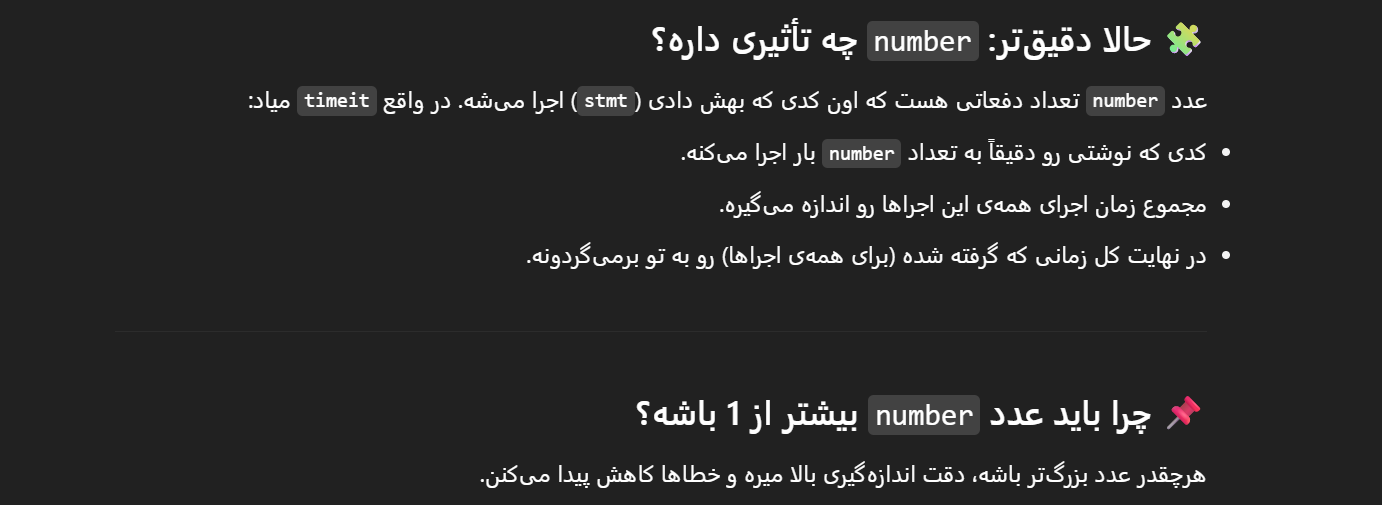

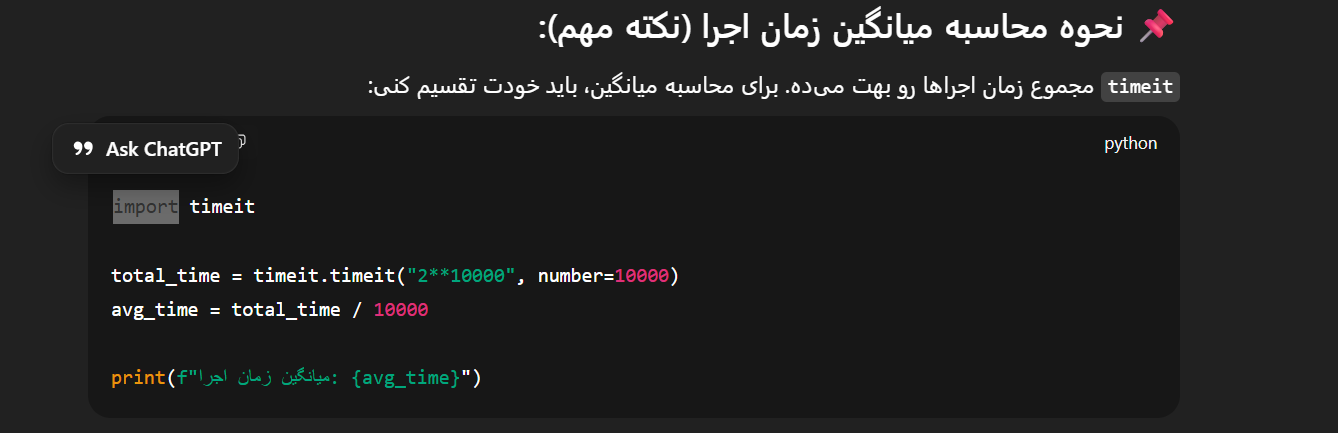

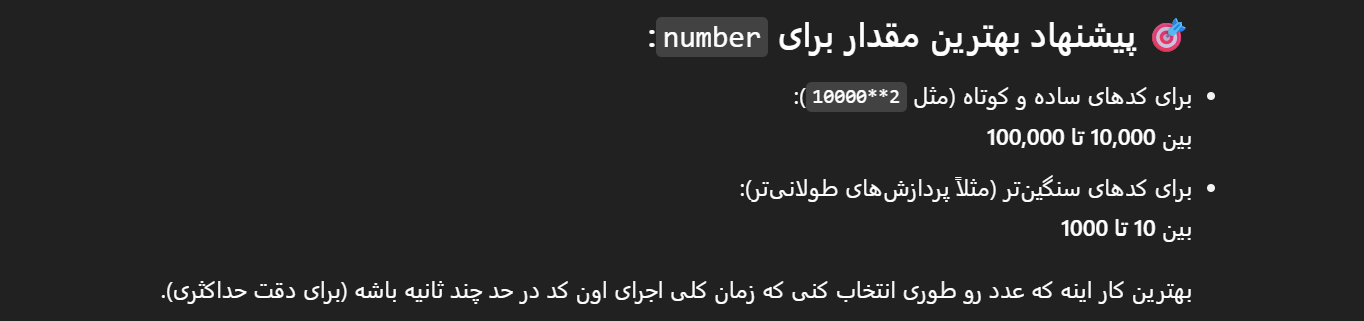

<div dir="rtl" align="right">

# 📘 تحلیل حافظه و کارایی اعداد صحیح (Integer)

---

## 🔢 تعداد ارقام یک عدد صحیح
- توجه به `math.log10(n)` برای محاسبهٔ تعداد ارقام.
- استفاده از `len(str(n))` هم مجاز است ولی کاملاً متفاوت در **حافظه** و **کارایی**.

</div>


In [ ]:
import math

def get_num_digits(n: int) -> int:
    return math.floor(math.log10(n)) + 1 if n > 0 else 1

print(get_num_digits(10**1000))

<div dir="rtl" align="right">

### 💡 تمرین:
- بنویس **`get_num_digits_str(n: int)`** که با `str()` انجام می‌دهد.
- **فرق کارایی** را بین دو رویکرد بررسی کن.

</div>


<div dir="rtl" align="right">

## 🧠 واکاوی عمیق حافظهٔ عدد صحیح (Integer Memory Analysis)
- استفاده از `ctypes` و `memoryview` برای دیدن بایت‌ها.

</div>


In [ ]:
import ctypes
import sys


def analyze_int_memory(n: int):
    print(f"Value: {n}")
    print(f"Address: {hex(id(n))}")
    print(f"Total size: {sys.getsizeof(n)} bytes")

    int_obj = ctypes.cast(id(n), ctypes.POINTER(ctypes.c_uint8 * sys.getsizeof(n))).contents
    print("Raw bytes:")
    for i, byte in enumerate(int_obj):
        print(f"{i:02}: {byte:02x}")

analyze_int_memory(123456789)

<div dir="rtl" align="right">

### 💡 تمرین:
- خودت **بایت‌های آخر** را به **عدد صحیح** تبدیل کن (little-endian).
- چگونه `0x075bcd15` می‌شود `123456789`؟
- از `int.from_bytes()` استفاده کن.

</div>


<div dir="rtl" align="right">

## ♻️ Reference Counting در پایتون
- `sys.getrefcount(obj)` نشان می‌دهد چند مرحله شیء **ارجاع** شده است.
- یک ارجاع اضافی برای خودِ فراخوانی `getrefcount()` وجود دارد.

</div>


In [ ]:
import sys

x = -548932568
y = x
print(sys.getrefcount(x))  # ممکنه 2 رو بده

del y
print(sys.getrefcount(x))

<div dir="rtl" align="right">

## ✅ خاتمه
- همهٔ این‌ها در حافظهٔ پایتون بر اساس **CPython** پیاده‌سازی شده‌اند.
- توسط `sys`، `ctypes`، `dis` می‌توان **کارایی** را هم بررسی کرد.

---

### 🔁 تمرین پایانی
1. `get_num_digits` و `get_num_digits_str` را با توضیحات + `timeit` بررسی کن.
2. بررسی بایت‌ها از دو عدد دیگر (مثل `2**64`).
3. Reference count برای `[]`، `{}` و `None` را چک کن.

</div>


<div dir="rtl" align="right">

## 📚 منابع جلسه
- **Fluent Python (Luciano Ramalho)** — فصل‌های مربوط به Data Model و اعداد/توابع داخلی.
- **Effective Python (Brett Slatkin)** — نکات کارایی و بهترین شیوه‌ها.
- **High Performance Python (Gorelick &amp; Ozsvald)** — فصل‌های پروفایلینگ و حافظه.
- **Python Docs**: `sys.getsizeof`, `sys.getrefcount`, `ctypes`, `int.from_bytes`, پیاده‌سازی CPython.
- **Designing Data-Intensive Applications (Kleppmann)** — نگاه سامانه‌ای به کارایی و داده (مرجع مکمل).

</div>
